In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer, make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
df = pd.read_csv('train.csv')
dtest = pd.read_csv('test.csv')

In [13]:
df['fem_1cl'] = 0

In [14]:
df[(df['Sex']=='female') & (df['Pclass']==1)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,fem_1cl
0,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0
7,338,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,16966,134.5000,E40,C,1,0
15,320,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.5000,E34,C,1,0
32,670,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",female,NaN,1,0,19996,52.0000,C126,S,1,0
36,497,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C,1,0
53,298,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,0,0
58,731,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,1,0
60,270,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S,1,0
74,821,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S,1,0
76,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1,0


In [15]:
df['Age'].fillna(int(df['Age'].mean()), inplace=True)
 
df['Embar'] = df['Embarked'][:]
df.loc[(df['Embar'] !='S')&(df['Embar'] !='C')&(df['Embar'] !='Q'),'Embar']=0
df.loc[df['Embar'] == 'S', 'Embar'] = 1
df.loc[df['Embar'] == 'Q', 'Embar'] = 2
df.loc[df['Embar'] == 'C', 'Embar'] = 3

In [16]:
dtest['Age'].fillna(int(dtest['Age'].mean()), inplace=True)

dtest['Embar'] = dtest['Embarked'][:]
dtest.loc[dtest['Embar'] == 'S', 'Embar'] = 1
dtest.loc[dtest['Embar'] == 'Q', 'Embar'] = 2
dtest.loc[dtest['Embar'] == 'C', 'Embar'] = 3
dtest.loc[(dtest['Embar'] !='S')&(dtest['Embar'] !='C')&(dtest['Embar'] !='Q'),'Embar']=0

In [17]:
# train
surv = np.array(df['Survived'])
age = np.array(df['Age']/10)
fare = np.array(df['Fare']/50)
cls = np.array(df['Pclass'])
emb = np.array(df['Embar'])

df['Sex1'] = df['Sex'][:]
df.loc[(df['Sex1'] == 'male'), 'Sex1'] = 1
df.loc[df['Sex1'] == 'female', 'Sex1'] = 2
sex = np.array(df['Sex1'])

# test
age_t = np.array(dtest['Age']/10)
fare_t = np.array(dtest['Fare']/50)
cls_t = np.array(dtest['Pclass'])
emb_t = np.array(dtest['Embar'])

dtest['Sex1'] = dtest['Sex'][:]
dtest.loc[(dtest['Sex1'] == 'male'), 'Sex1'] = 1
dtest.loc[dtest['Sex1'] == 'female', 'Sex1'] = 2
sex_t = np.array(dtest['Sex1'])

In [18]:
arr_train = np.zeros((len(age),3))
arr_test = np.zeros((len(age_t),3))

In [19]:
arr_train[:,0] = sex
arr_train[:,1] = cls
#arr_train[:,2] = emb
arr_train[:,2] = age
#arr_train[:,4] = fare

arr_test[:,0] = sex_t
arr_test[:,1] = cls_t
#arr_test[:,2] = emb_t
arr_test[:,2] = age_t
#arr_test[:,4] = emb_t

In [20]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [21]:
x_train, x_test, y_train, y_test = train_test_split(arr_train, surv, test_size=0.3)

In [22]:
k_range = [3,5,7,9,11,13,15,17,19,21,23,25]
scores = {}
score_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    score_list.append(metrics.accuracy_score(y_test, y_pred))

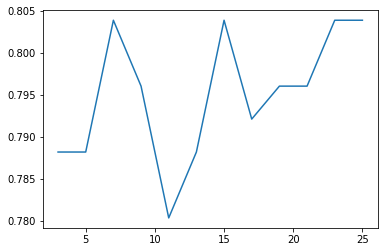

In [23]:
%matplotlib inline
plt.plot(k_range, score_list)

In [24]:
import sklearn.metrics as sm
scores = {}
score_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=7)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    score_list.append(metrics.accuracy_score(y_test, y_pred))
    
    
sm.accuracy_score(y_test, y_pred)

0.803921568627451

In [25]:
# предсказание
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(arr_train, surv)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [26]:
res = knn.predict(arr_test)

In [30]:
res.to_csv('res28.csv', index=False)

TypeError: 'DataFrame' object is not callable

In [104]:
#rep = pd.read_csv('sample_submission.csv')

In [245]:
for i in range(len(res)):
    rep['Survived'][i] = res[i]
    

In [255]:
rep.to_csv('res28.csv', index=False)

ValueError: 'Survived' is not a valid estimator for `bins`

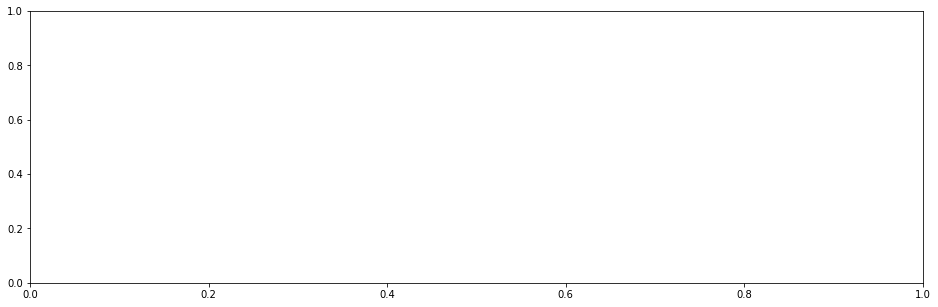

In [254]:
fig = plt.figure(figsize=(16,5))
ax1 = plt.subplot(111)

#-  df.plot.scatter('SalePrice','OverallQual',ax = ax1)
df.plot.hist('Pclass','Survived',ax = ax1)

In [7]:
df[:] = round(df[:],1)

In [8]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Fare1
0,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0,B42,S,1,30.0
1,1249,3,"Lockyer, Mr. Edward",male,NaN,0,0,1222,7.9,NaN,S,0,7.9
2,1240,2,"Giles, Mr. Ralph",male,24.0,0,0,248726,13.5,NaN,S,0,13.5
3,221,3,"Sunderland, Mr. Victor Francis",male,16.0,0,0,SOTON/OQ 392089,8.0,NaN,S,1,8.0
4,1105,2,"Howard, Mrs. Benjamin (Ellen Truelove Arman)",female,60.0,1,0,24065,26.0,NaN,S,0,26.0
5,183,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.4,NaN,S,0,31.4
6,979,3,"Badman, Miss. Emily Louisa",female,18.0,0,0,A/4 31416,8.0,NaN,S,1,8.0
7,338,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,16966,134.5,E40,C,1,134.5
8,87,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.4,NaN,S,0,34.4
9,347,2,"Smith, Miss. Marion Elsie",female,40.0,0,0,31418,13.0,NaN,S,1,13.0
